# PROJECT NAME
https://github.com/vjann/DLC

### Description:
INSERT DESCRIPTION HERE

## Create a new project

Keep the projects separate. This function creates a new project with subdirectories and a basic configuration file under DeepLabCut directory.
You can add new videos to the project at any stage of the project. 

In [1]:
import datetime
import deeplabcut

In [2]:
task='just-diagonal' # Enter the name of your experiment Task
experimenter='vj' # Enter the name of the experimenter
video=[r"C:\Users\vjj14\Downloads\diag2_Trim.mp4", r"C:\Users\vjj14\Downloads\diag2_Trim2.mp4", r"C:\Users\vjj14\Downloads\diagonal1080p240fps_Trim.mp4", r"C:\Users\vjj14\Downloads\diagonalzoom1080p240fps_Trim.mp4"] # Enter the paths of your videos you want to grab frames from.
path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory= r'C:\Users\vjj14\Desktop\DeepLabCut',copy_videos=True) #change the working directory to where you want the folders created.
# The function returns the path, where your project is. 


Created "C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos"
Created "C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\labeled-data"
Created "C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\training-datasets"
Created "C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models"
Copying the videos
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim.mp4
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim2.mp4
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonal1080p240fps_Trim.mp4
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4
Generated "C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\config.yaml"

A new project with name just-diagonal-vj-2019-06-12 is created at C:\Users\vjj14\Desktop\DeepLabCut and a configurable file (config.yaml) is stored there. Change the parameters in this fil

In [4]:
path_config_file=r"C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\config.yaml"
project_name='just-diagonal'
def write_log(text, new_line=True):
    time_log= open("{0}log{1}.txt".format(path_config_file[:-11], project_name),"a+")
    if new_line:
        time_log.write("\n")
    time_log.write(text)
    time_log.close()
from time import sleep
def prompt_with_timeout(prompt_message):
  print('Waiting... please press Ctrl-C when you wish to proceed.')
  try:
    for i in range(0, 2*60): # 2 minutes
      sleep(1)
    return "No Input Received"
  except KeyboardInterrupt:
    return input(prompt_message)
    print("log written")

## Extract frames from videos 
Select diverse frames, which are typical for the behavior you study that should be labeled.
(algo=='uniform') selects N frames either uniformly sampled from a particular video (or folder) . Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.
Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later, crop the frames to remove unnecessary parts.
Always check the output of cropping.

In [34]:
start = datetime.datetime.now()
write_log(str(start) + "***extract_frames start")

%matplotlib inline
deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=False) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 

end = datetime.datetime.now()
write_log(str(end) + "***extract_frames end")
write_log("   time elapsed:" + str(end-start))

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\videos\1080p.MOV ?
yes/nono

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [4]:
start = datetime.datetime.now()
write_log(str(start) + "***label_frames start")

%gui wx
deeplabcut.label_frames(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***label_frames end")
write_log("   time elapsed:" + str(end-start))

ERROR:root:Cannot activate multiple GUI eventloops


ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'wx' is currently running

**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. 

In [10]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by vj.
C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\labeled-data\1080p_labeled  already exists!
They are stored in the following folder: C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\labeled-data\1080p_labeled.
Attention: C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\labeled-data\1080p does not appear to have labeled data!
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

In [6]:
start = datetime.datetime.now()
write_log(str(start) + "***create_training_dataset start")

deeplabcut.create_training_dataset(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***create_training_dataset end")
write_log("   time elapsed:" + str(end-start))

log written
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\training-datasets\iteration-0\UnaugmentedDataSet_just-diagonalJun12  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-0\just-diagonalJun12-trainset90shuffle1  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-0\just-diagonalJun12-trainset90shuffle1//train  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-0\just-diagonalJun12-trainset90shuffle1//test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!
log written
log written


In [6]:
?deeplabcut.create_training_dataset

## Start training - If you want to use a CPU, continue. 
### If you want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [8]:
start = datetime.datetime.now()
write_log(str(start) + "***train_network start")
write_log("   DESCRIPTION:" + prompt_with_timeout("Training description(Network, Iterations, etc) "))

deeplabcut.train_network(path_config_file, saveiters=1000, displayiters=100, maxiters=30003)

end = datetime.datetime.now()
write_log(str(end) + "***train_network end")
write_log("   time elapsed:" + str(end-start))

Waiting... please press Ctrl-C when you wish to proceed.
Training description(Network, Iterations, etc) 3rd network(iter-2), another zoomed in uncertain outlier labels (20 of them). 30k max iters


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['leftEye',
                      'nose',
                      'hand',
                      'index',
                      'middle',
                      'ring',
                      'pinky',
                      'pellet'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-2\\UnaugmentedDataSet_just-diagonalJun12\\just-diagonal_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir'

INFO:tensorflow:Restoring parameters from C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt


INFO:tensorflow:Restoring parameters from C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt


Max_iters overwritten as 30003
Display_iters overwritten as 100
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\dlc-models\\iteration-2\\just-diagonalJun12-trainset90shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth':

iteration: 100 loss: 0.0751 lr: 0.005
iteration: 200 loss: 0.0231 lr: 0.005
iteration: 300 loss: 0.0202 lr: 0.005
iteration: 400 loss: 0.0184 lr: 0.005
iteration: 500 loss: 0.0172 lr: 0.005
iteration: 600 loss: 0.0180 lr: 0.005
iteration: 700 loss: 0.0180 lr: 0.005
iteration: 800 loss: 0.0162 lr: 0.005
iteration: 900 loss: 0.0160 lr: 0.005
iteration: 1000 loss: 0.0156 lr: 0.005
iteration: 1100 loss: 0.0137 lr: 0.005
iteration: 1200 loss: 0.0144 lr: 0.005
iteration: 1300 loss: 0.0137 lr: 0.005
iteration: 1400 loss: 0.0144 lr: 0.005
iteration: 1500 loss: 0.0122 lr: 0.005
iteration: 1600 loss: 0.0124 lr: 0.005
iteration: 1700 loss: 0.0136 lr: 0.005
iteration: 1800 loss: 0.0115 lr: 0.005
iteration: 1900 loss: 0.0125 lr: 0.005
iteration: 2000 loss: 0.0124 lr: 0.005
iteration: 2100 loss: 0.0123 lr: 0.005
iteration: 2200 loss: 0.0106 lr: 0.005
iteration: 2300 loss: 0.0111 lr: 0.005
iteration: 2400 loss: 0.0110 lr: 0.005
iteration: 2500 loss: 0.0113 lr: 0.005
iteration: 2600 loss: 0.0100 lr: 0

iteration: 21100 loss: 0.0042 lr: 0.02
iteration: 21200 loss: 0.0040 lr: 0.02
iteration: 21300 loss: 0.0035 lr: 0.02
iteration: 21400 loss: 0.0044 lr: 0.02
iteration: 21500 loss: 0.0038 lr: 0.02
iteration: 21600 loss: 0.0038 lr: 0.02
iteration: 21700 loss: 0.0036 lr: 0.02
iteration: 21800 loss: 0.0038 lr: 0.02
iteration: 21900 loss: 0.0037 lr: 0.02
iteration: 22000 loss: 0.0037 lr: 0.02
iteration: 22100 loss: 0.0034 lr: 0.02
iteration: 22200 loss: 0.0042 lr: 0.02
iteration: 22300 loss: 0.0037 lr: 0.02
iteration: 22400 loss: 0.0042 lr: 0.02
iteration: 22500 loss: 0.0046 lr: 0.02
iteration: 22600 loss: 0.0035 lr: 0.02
iteration: 22700 loss: 0.0036 lr: 0.02
iteration: 22800 loss: 0.0038 lr: 0.02
iteration: 22900 loss: 0.0035 lr: 0.02
iteration: 23000 loss: 0.0034 lr: 0.02
iteration: 23100 loss: 0.0037 lr: 0.02
iteration: 23200 loss: 0.0035 lr: 0.02
iteration: 23300 loss: 0.0039 lr: 0.02
iteration: 23400 loss: 0.0035 lr: 0.02
iteration: 23500 loss: 0.0034 lr: 0.02
iteration: 23600 loss: 0.

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


In [18]:
?deeplabcut.train_network

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [9]:
start = datetime.datetime.now()
write_log(str(start) + "***evaluate_network start")

deeplabcut.evaluate_network(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***evalaute_network end")
write_log("   time elapsed:" + str(end-start))

C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12/evaluation-results/  already exists!


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['leftEye',
                      'nose',
                      'hand',
                      'index',
                      'middle',
                      'ring',
                      'pinky',
                      'pellet'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-2\\UnaugmentedDataSet_just-diagonalJun12\\just-diagonal_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir'

Running  DeepCut_resnet50_just-diagonalJun12shuffle1_30003  with # of trainingiterations: 30003
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


Analyzing data...


264it [00:38,  6.37it/s]


Done and results stored for snapshot:  snapshot-30003
Results for 30003  training iterations: 90 1 train error: 4.47 pixels. Test error: 10.15  pixels.
With pcutoff of 0.1  train error: 4.48 pixels. Test error: 9.14 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [10]:
# videofile_path = [r"C:\Users\vjj14\Downloads\compressed25.mp4"] #Enter the list of videos to analyze.
videos=[[r"C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim.mp4"], [r"C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim2.mp4"], [r"C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonal1080p240fps_Trim.mp4"], [r"C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4"]]
for videofile_path in videos:
    start = datetime.datetime.now()
    write_log(str(start) + "***analyze_videos start")
    write_log("   VIDEO: " + str(videofile_path))

    deeplabcut.analyze_videos(path_config_file,videofile_path, save_as_csv=True)

    end = datetime.datetime.now()
    write_log(str(end) + "***analyze_videos end")
    write_log("   time elapsed:" + str(end-start))

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['leftEye',
                      'nose',
                      'hand',
                      'index',
                      'middle',
                      'ring',
                      'pinky',
                      'pellet'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-2\\UnaugmentedDataSet_just-diagonalJun12\\just-diagonal_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir'

Using snapshot-30003 for model C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


Starting to analyze %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim.mp4
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim.mp4
Duration of video [s]:  15.43 , recorded with  30.0 fps!
Overall # of frames:  463  found with (before cropping) frame dimensions:  1080 1920
Starting to extract posture


470it [00:41, 11.20it/s]                                                                                               

Detected frames:  463


Saving results in C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['leftEye',
                      'nose',
                      'hand',
                      'index',
                      'middle',
                      'ring',
                      'pinky',
                      'pellet'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-2\\UnaugmentedDataSet_just-diagonalJun12\\just-diagonal_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir'

Using snapshot-30003 for model C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


Starting to analyze %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim2.mp4
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim2.mp4
Duration of video [s]:  8.0 , recorded with  30.0 fps!
Overall # of frames:  240  found with (before cropping) frame dimensions:  1080 1920
Starting to extract posture


250it [00:20, 11.31it/s]                                                                                               

Detected frames:  240


Saving results in C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['leftEye',
                      'nose',
                      'hand',
                      'index',
                      'middle',
                      'ring',
                      'pinky',
                      'pellet'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-2\\UnaugmentedDataSet_just-diagonalJun12\\just-diagonal_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir'

Using snapshot-30003 for model C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


Starting to analyze %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonal1080p240fps_Trim.mp4
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonal1080p240fps_Trim.mp4
Duration of video [s]:  127.47 , recorded with  30.0 fps!
Overall # of frames:  3824  found with (before cropping) frame dimensions:  1080 1920
Starting to extract posture


3838it [05:24, 11.67it/s]                                                                                              

Detected frames:  3824


Saving results in C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['leftEye',
                      'nose',
                      'hand',
                      'index',
                      'middle',
                      'ring',
                      'pinky',
                      'pellet'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-2\\UnaugmentedDataSet_just-diagonalJun12\\just-diagonal_vj90shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir'

Using snapshot-30003 for model C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\dlc-models\iteration-2\just-diagonalJun12-trainset90shuffle1\train\snapshot-30003


Starting to analyze %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4
Duration of video [s]:  90.47 , recorded with  30.0 fps!
Overall # of frames:  2714  found with (before cropping) frame dimensions:  1080 1920
Starting to extract posture


2727it [03:49, 11.60it/s]                                                                                              

Detected frames:  2714


Saving results in C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


In [13]:
?deeplabcut.analyze_videos

 16%|████████████▎                                                                | 2480/15561 [03:30<17:57, 12.14it/s]

## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [3]:
alg = 'uncertain'
param = 0.1 #epsilon or p_bound
vid = [r"C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4"]

start = datetime.datetime.now()
write_log(str(start) + "***extract_outlier_frames start")

deeplabcut.extract_outlier_frames(path_config_file, vid, outlieralgorithm=alg, p_bound=param)
num_frames = prompt_with_timeout("number of frames selected?")
write_log("   VIDEOS: {0}, ALGORITHM: {1}, PARAMETER: {2}, NUM FRAMES: {3}".format(str(vid), alg, param, num_frames))

end = datetime.datetime.now()
write_log(str(end) + "***analyze_videos end")
write_log("   time elapsed:" + str(end-start))

network parameters: DeepCut_resnet50_just-diagonalJun12shuffle1_30002
Method  uncertain  found  2462  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noyes
Frames from video diagonalzoom1080p240fps_Trim  already extracted (more will be added)!
Loading video...
Duration of video [s]:  90.46666666666667 , recorded @  30.0 fps!
Overall # of frames:  2714 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 90.47  seconds.
Extracting and downsampling... 2461  frames from the video.


2461it [01:31, 26.95it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [299, 992, 2320, 663, 1848, 1994, 1587, 2512, 1659, 2214, 2624, 1696, 677, 2083, 1641, 1351, 791, 436, 2696, 363]
New video was added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\diagonalzoom1080p240fps_Trim.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Waiting... please press Ctrl-C when you wish to proceed.


NameError: name 'sleep' is not defined

In [13]:
?deeplabcut.extract_outlier_frames

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [5]:
start = datetime.datetime.now()
write_log(str(start) + "***refine_frames start")

%gui wx
deeplabcut.refine_labels(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***refine_frames end")
write_log("   time elapsed:" + str(end-start))


ERROR:root:Cannot activate multiple GUI eventloops


Windows
Checking labels if they are outside the image
A training dataset file is already found for this video. The refined machine labels are merged to this data!
Closing... The refined labels are stored in a subdirectory under labeled-data. Use the function 'merge_datasets' to augment the training dataset, and then re-train a network using create_training_dataset followed by train_network!


In [6]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
start = datetime.datetime.now()
write_log(str(start) + "***merge_datasets start")

deeplabcut.merge_datasets(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***merge_datasets end")
write_log("   time elapsed:" + str(end-start))

Merged data sets and updated refinement iteration to 2.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


In [27]:
?deeplabcut.merge_datasets

## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [7]:
start = datetime.datetime.now()
write_log(str(start) + "***create_training_dataset start")

deeplabcut.create_training_dataset(path_config_file)

end = datetime.datetime.now()
write_log(str(end) + "***create_training_dataset end")
write_log("   time elapsed:" + str(end-start))

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [11]:
# videos=[LIST OF VIDEOS]
for videofile_path in videos:
    start = datetime.datetime.now()
    write_log(str(start) + "***create_labeled_video start")
    write_log("   VIDEOS: {}".format(str(videofile_path)))

    deeplabcut.create_labeled_video(path_config_file,videofile_path)

    end = datetime.datetime.now()
    write_log(str(end) + "***create_labeled_video end")
    write_log("   time elapsed:" + str(end-start))

Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diag2_Trim.mp4']
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim.mp4 and data.
False 0 1080 0 1920
463
Duration of video [s]:  15.43 , recorded with  30.0 fps!
Overall # of frames:  463 with cropped frame dimensions:  1080 1920
Generating frames and creating video.


100%|████████████████████████████████████████████████████████████████████████████████| 463/463 [00:08<00:00, 54.32it/s]


Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diag2_Trim2.mp4']
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim2.mp4 and data.
False 0 1080 0 1920
240
Duration of video [s]:  8.0 , recorded with  30.0 fps!
Overall # of frames:  240 with cropped frame dimensions:  1080 1920
Generating frames and creating video.


100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:04<00:00, 57.13it/s]


Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diagonal1080p240fps_Trim.mp4']
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonal1080p240fps_Trim.mp4 and data.
False 0 1080 0 1920
3824
Duration of video [s]:  127.47 , recorded with  30.0 fps!
Overall # of frames:  3824 with cropped frame dimensions:  1080 1920
Generating frames and creating video.


100%|██████████████████████████████████████████████████████████████████████████████| 3824/3824 [01:06<00:00, 57.75it/s]


Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diagonalzoom1080p240fps_Trim.mp4']
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4 and data.
False 0 1080 0 1920
2714
Duration of video [s]:  90.47 , recorded with  30.0 fps!
Overall # of frames:  2714 with cropped frame dimensions:  1080 1920
Generating frames and creating video.


100%|██████████████████████████████████████████████████████████████████████████████| 2714/2714 [00:46<00:00, 54.96it/s]


In [22]:
?deeplabcut.create_labeled_video

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [45]:
videofile_path

['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\frontslowmo-vj-2019-06-05\\videos\\1080p.MOV']

C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim.mp4
Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diag2_Trim.mp4']
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses\diag2_Trim  already exists!
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim.mp4 and data.


<IPython.core.display.Javascript object>


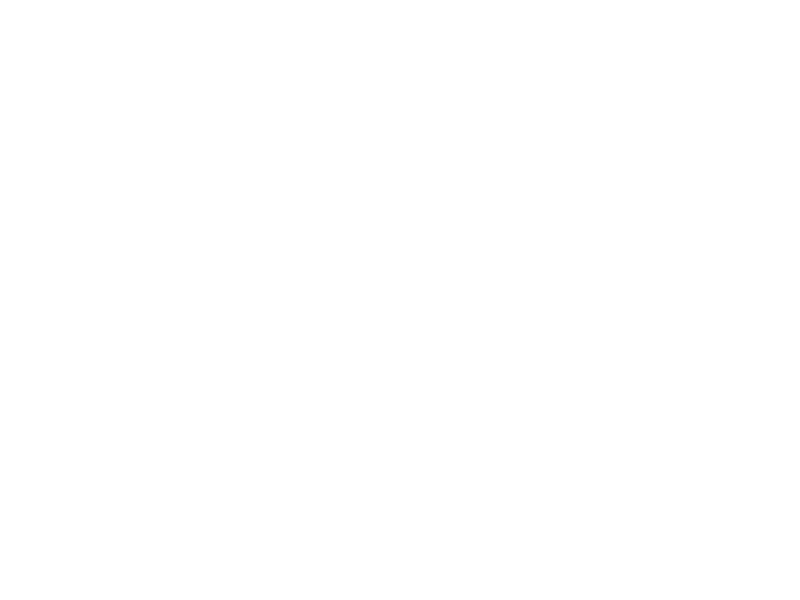

<IPython.core.display.Javascript object>


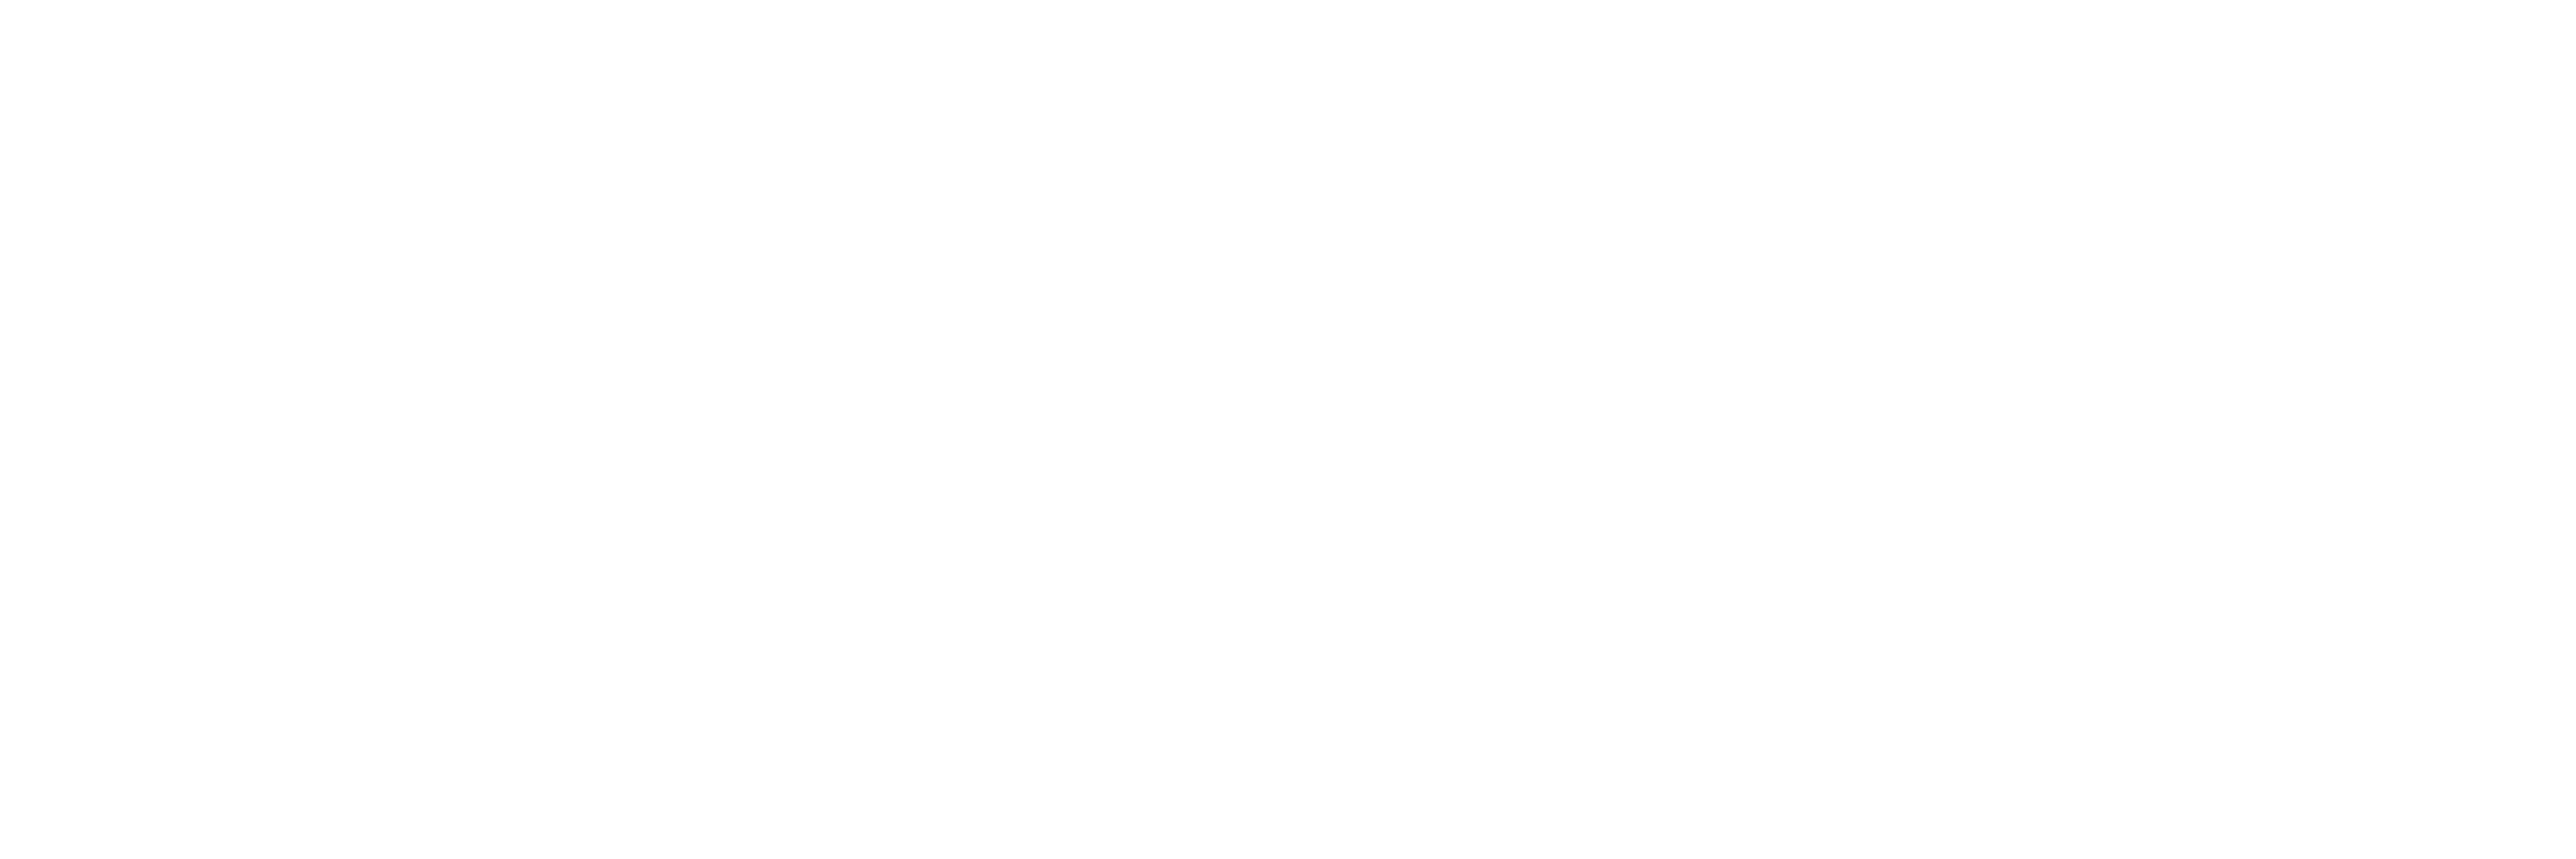

<IPython.core.display.Javascript object>


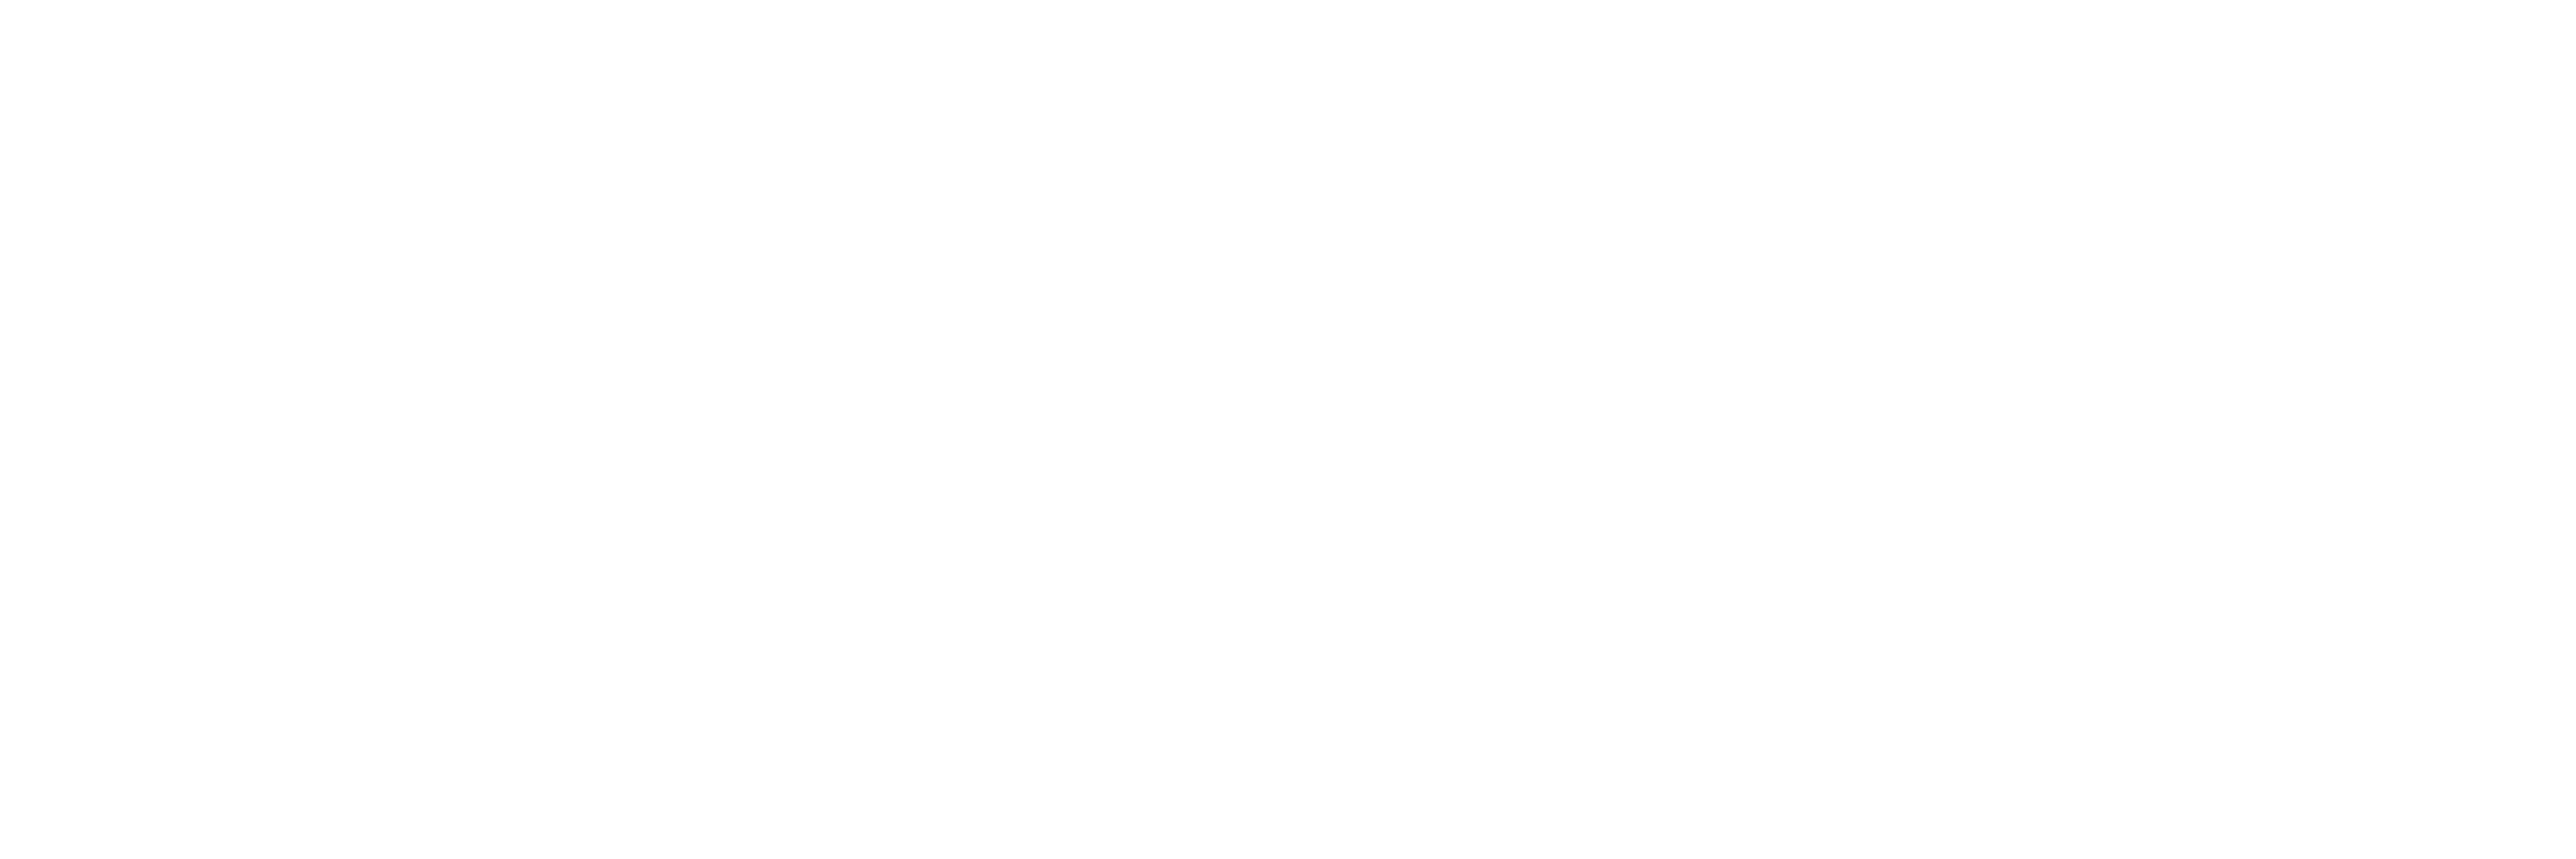

<IPython.core.display.Javascript object>


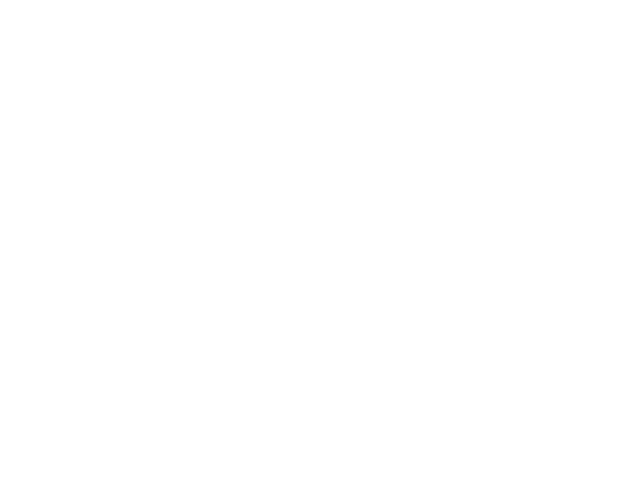

Plots created! Please check the directory "plot-poses" within the video directory
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim2.mp4
Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diag2_Trim2.mp4']
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses\diag2_Trim2  already exists!
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diag2_Trim2.mp4 and data.


<IPython.core.display.Javascript object>


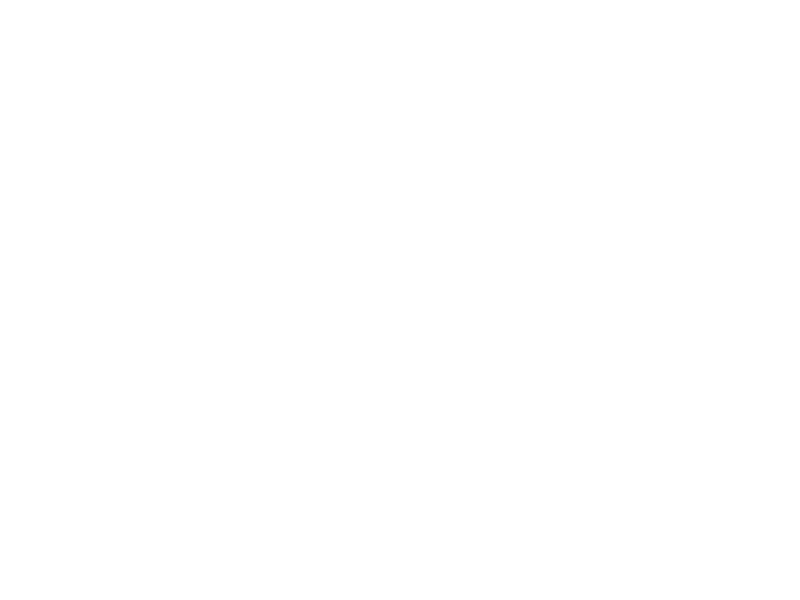

<IPython.core.display.Javascript object>


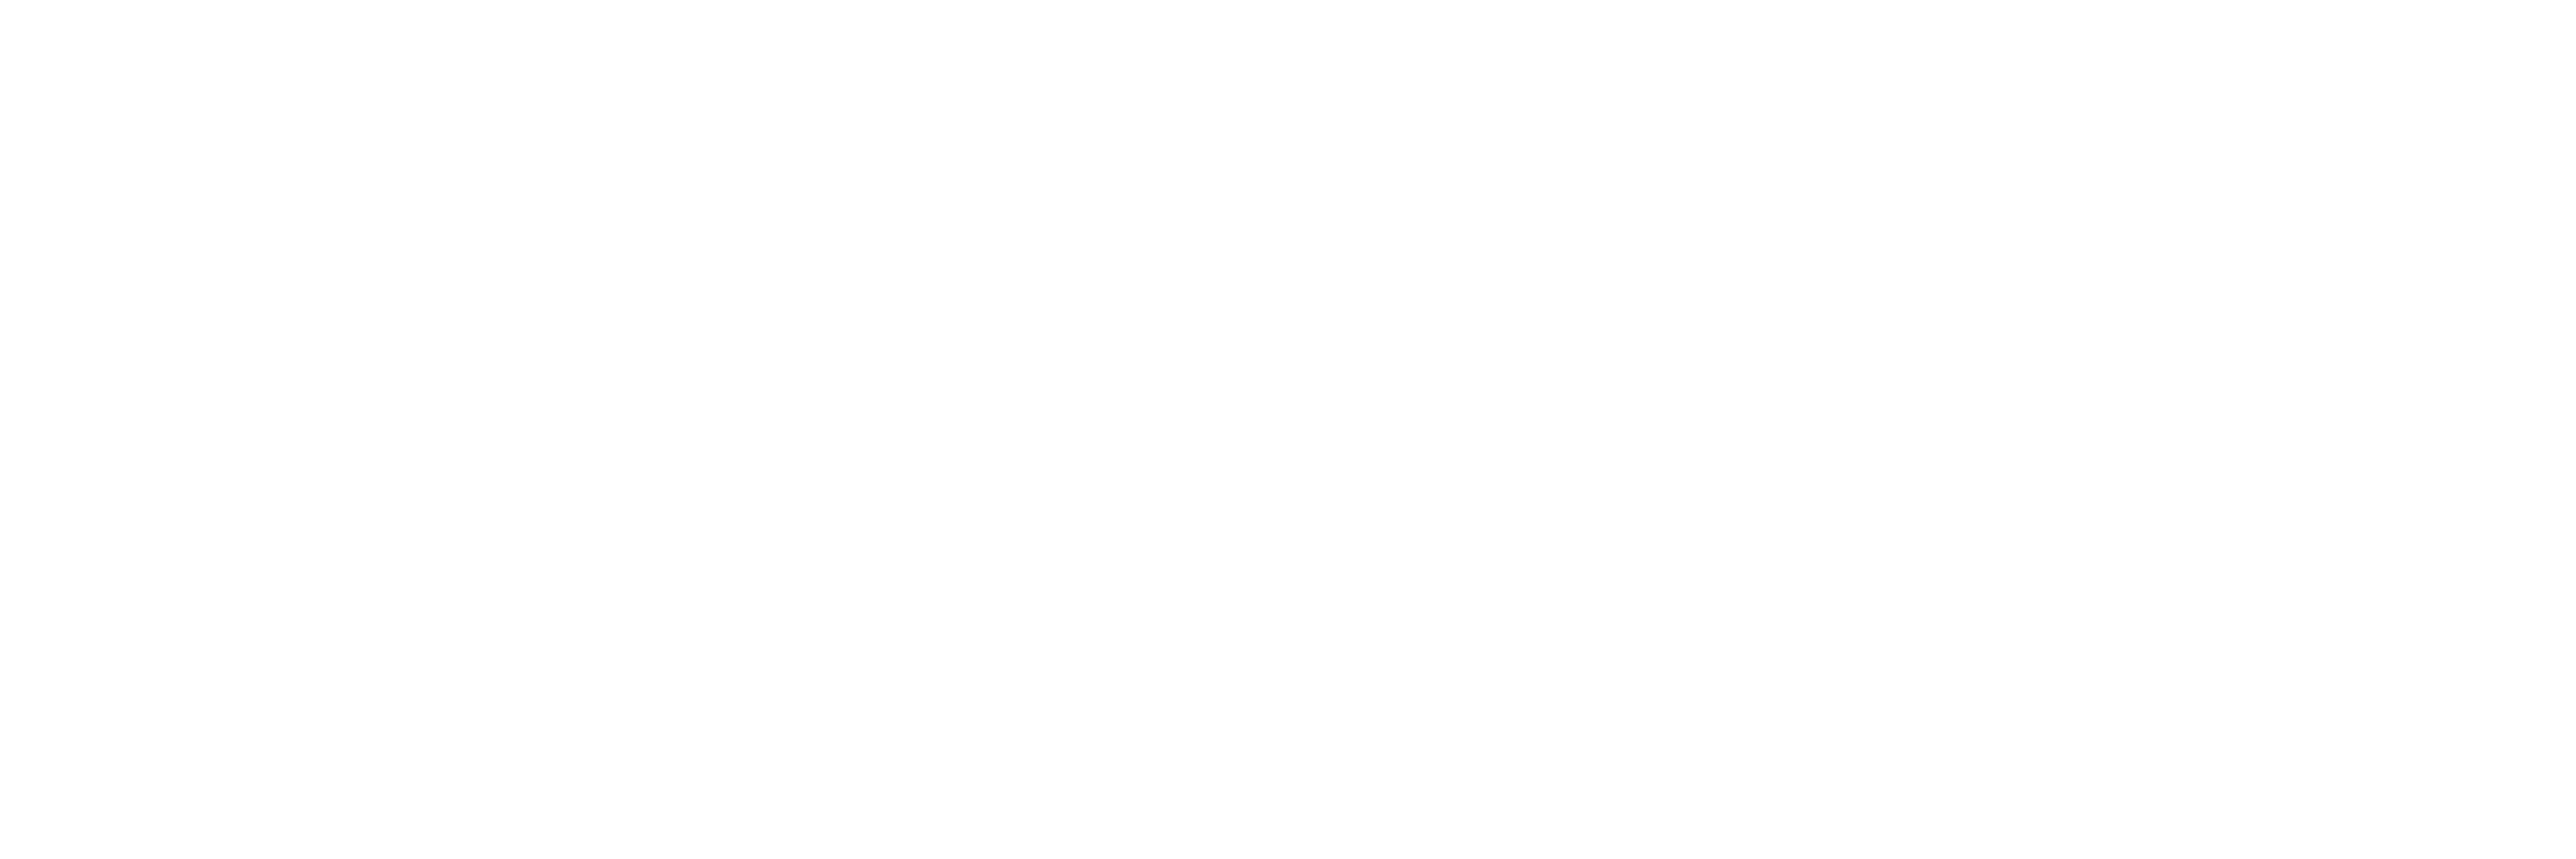

<IPython.core.display.Javascript object>


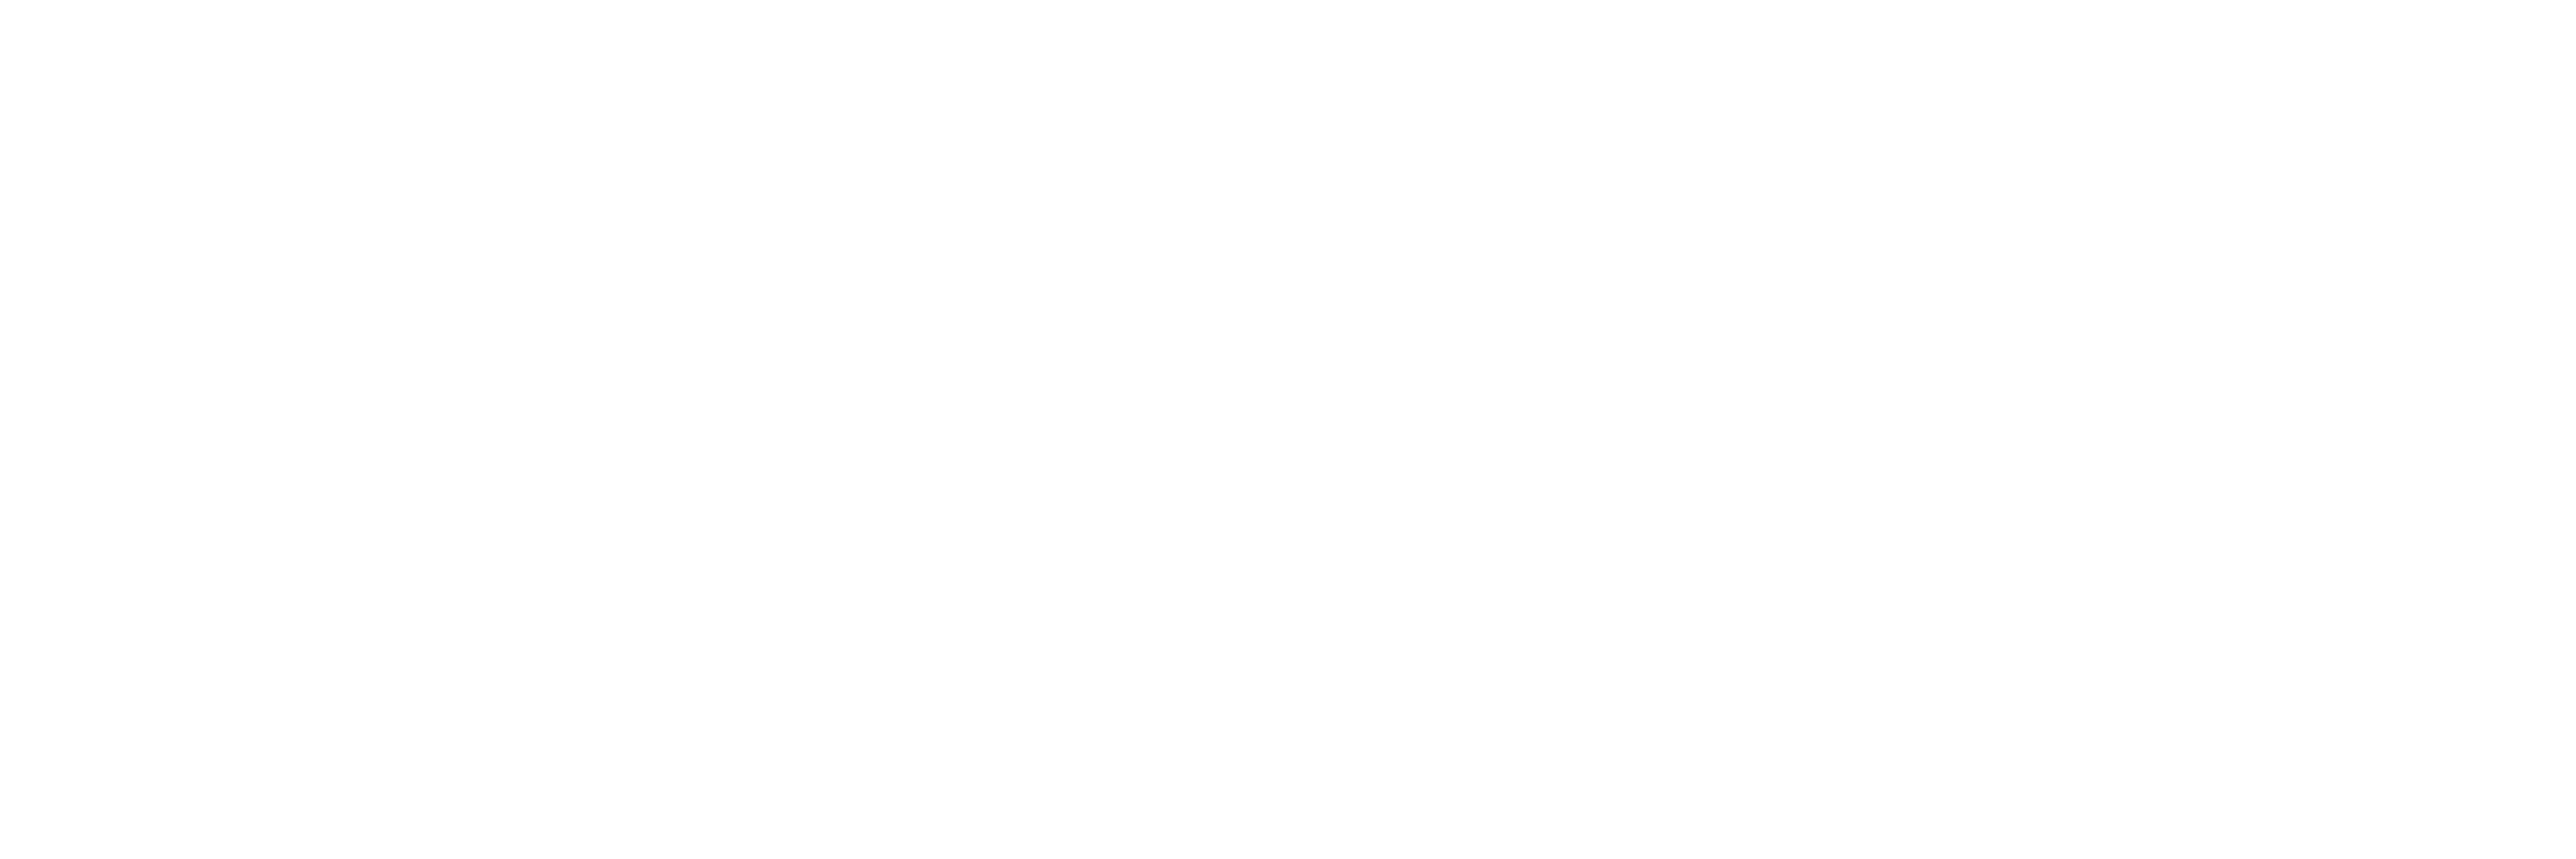

<IPython.core.display.Javascript object>


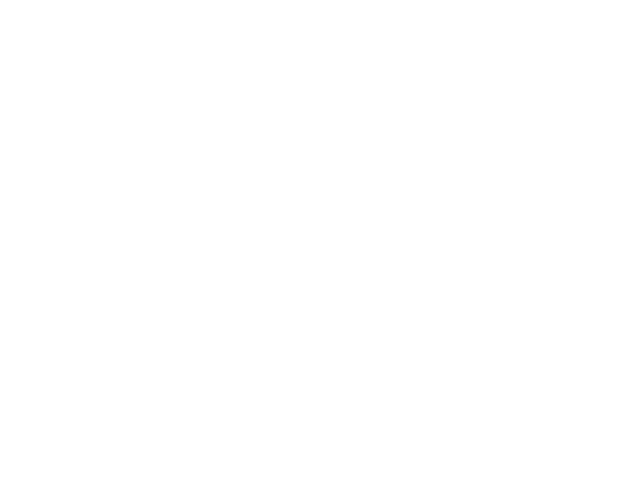

Plots created! Please check the directory "plot-poses" within the video directory
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonal1080p240fps_Trim.mp4
Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diagonal1080p240fps_Trim.mp4']
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses\diagonal1080p240fps_Trim  already exists!
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonal1080p240fps_Trim.mp4 and data.


<IPython.core.display.Javascript object>


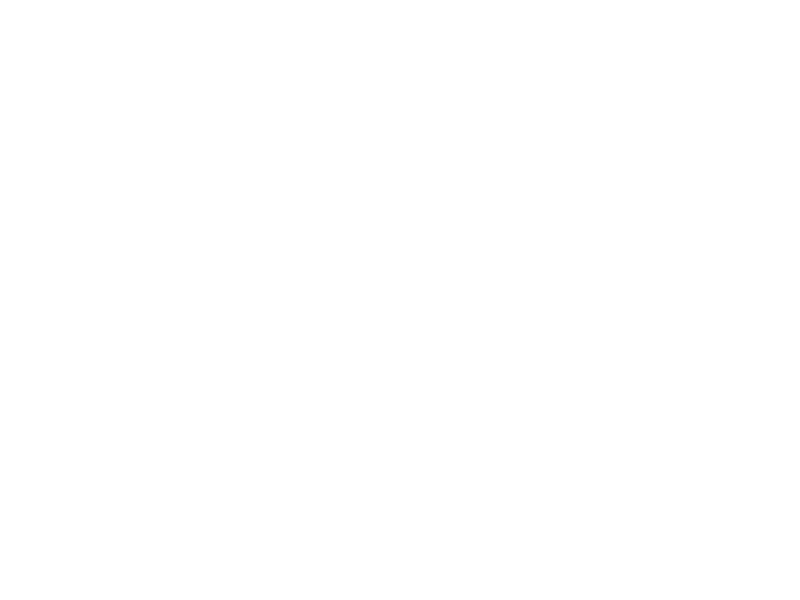

<IPython.core.display.Javascript object>


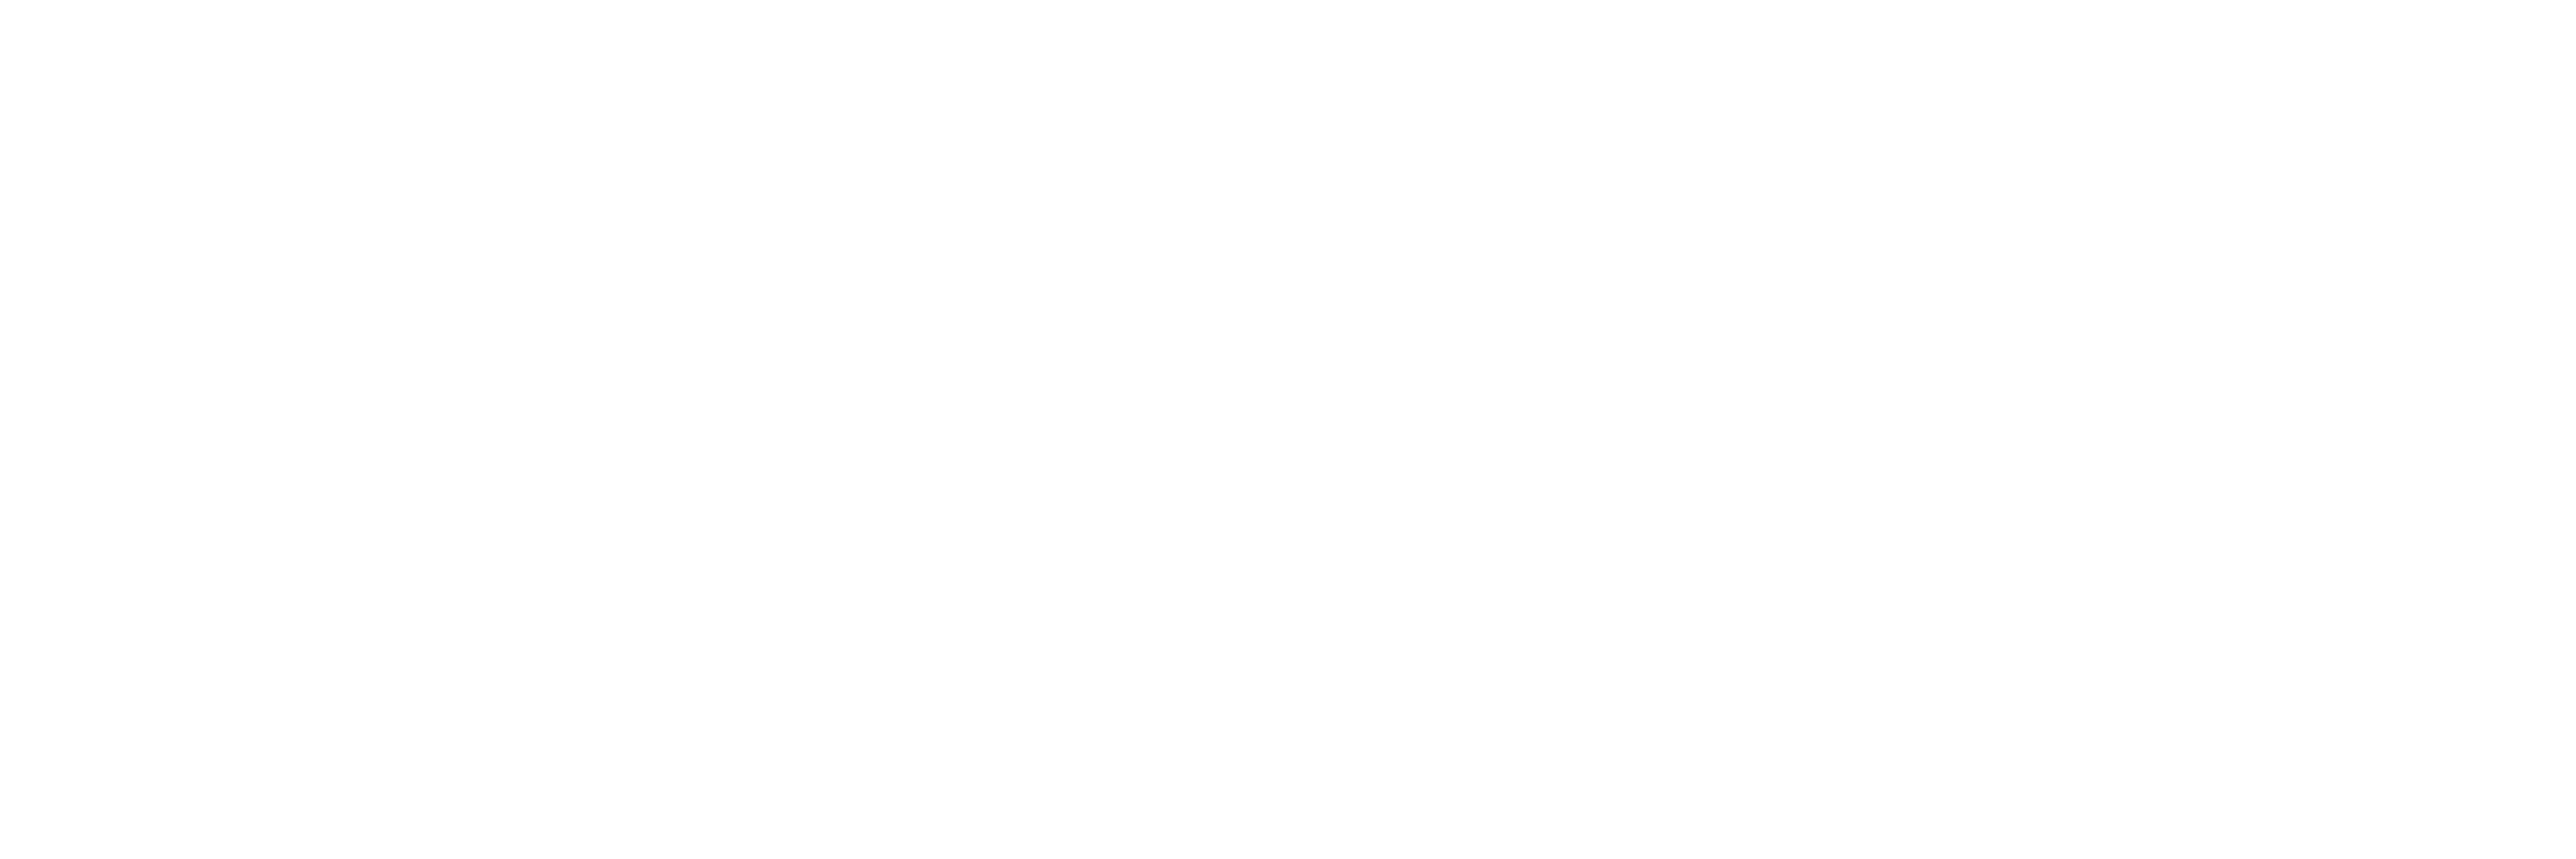

<IPython.core.display.Javascript object>


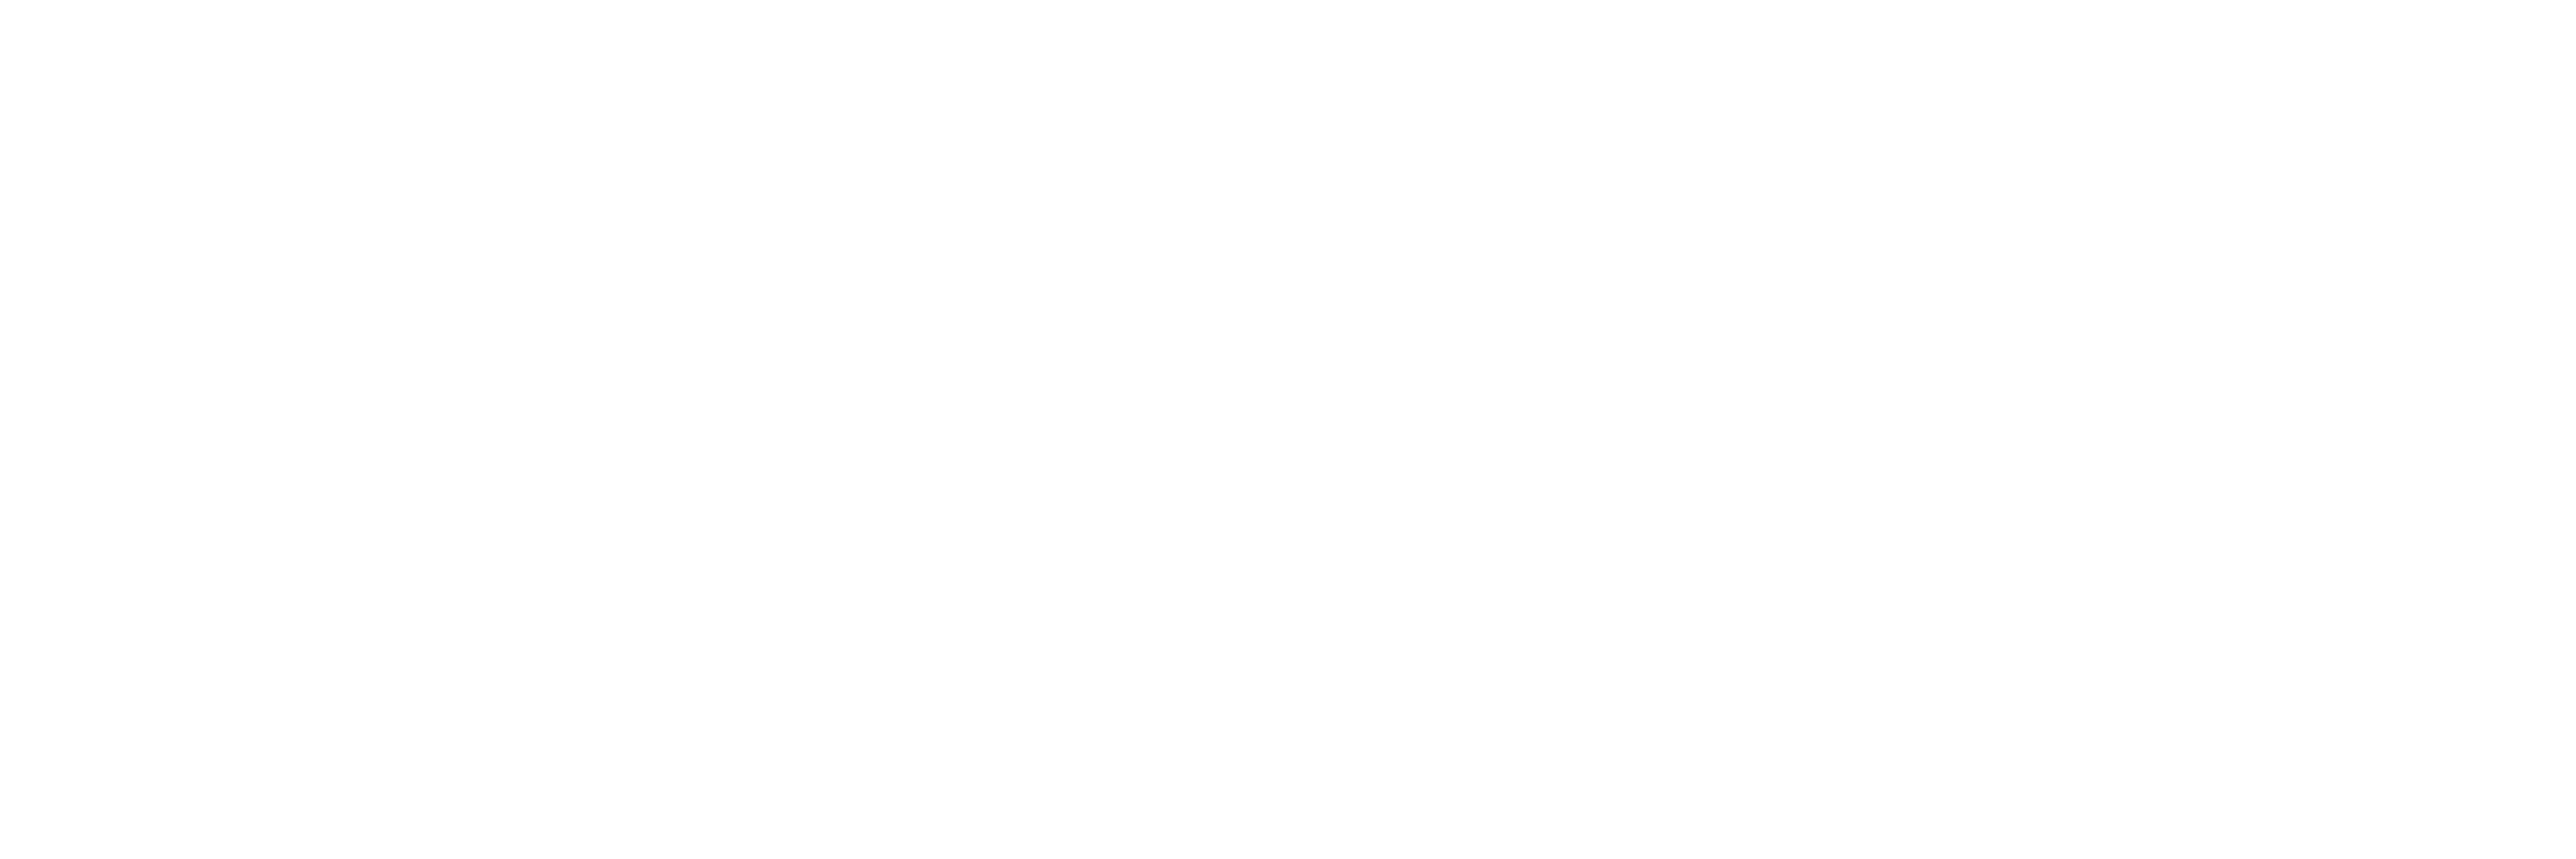

<IPython.core.display.Javascript object>


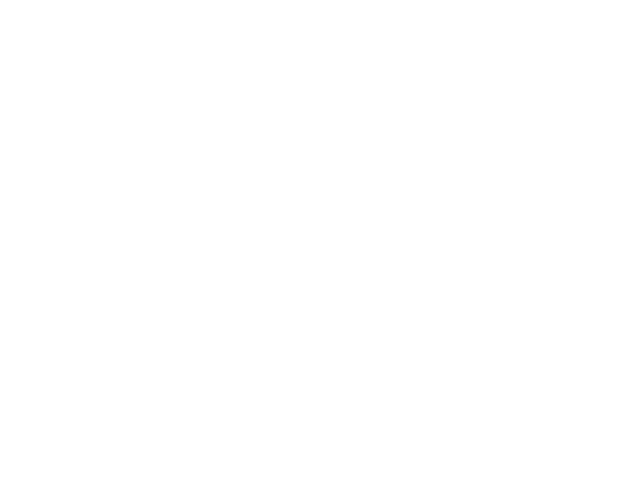

Plots created! Please check the directory "plot-poses" within the video directory
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4
Starting %  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\just-diagonal-vj-2019-06-12\\videos\\diagonalzoom1080p240fps_Trim.mp4']
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\plot-poses\diagonalzoom1080p240fps_Trim  already exists!
Loading  C:\Users\vjj14\Desktop\DeepLabCut\just-diagonal-vj-2019-06-12\videos\diagonalzoom1080p240fps_Trim.mp4 and data.


<IPython.core.display.Javascript object>


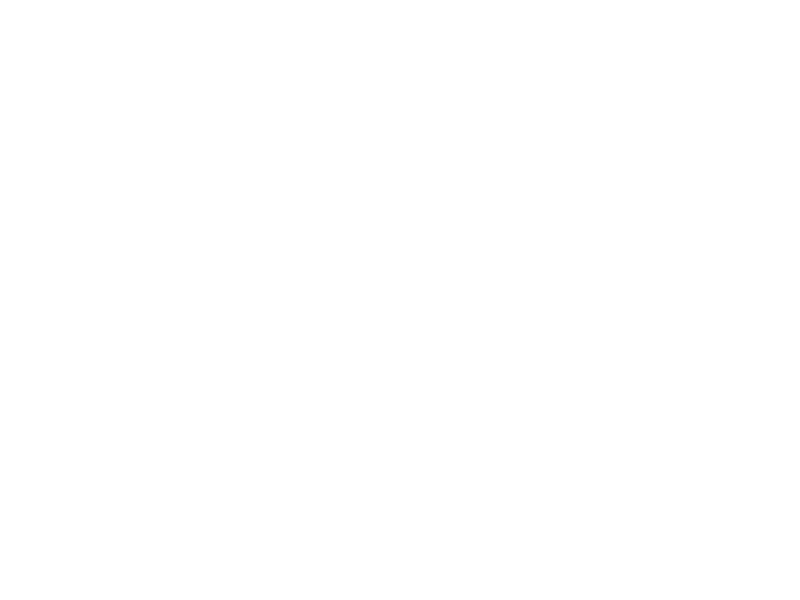

<IPython.core.display.Javascript object>


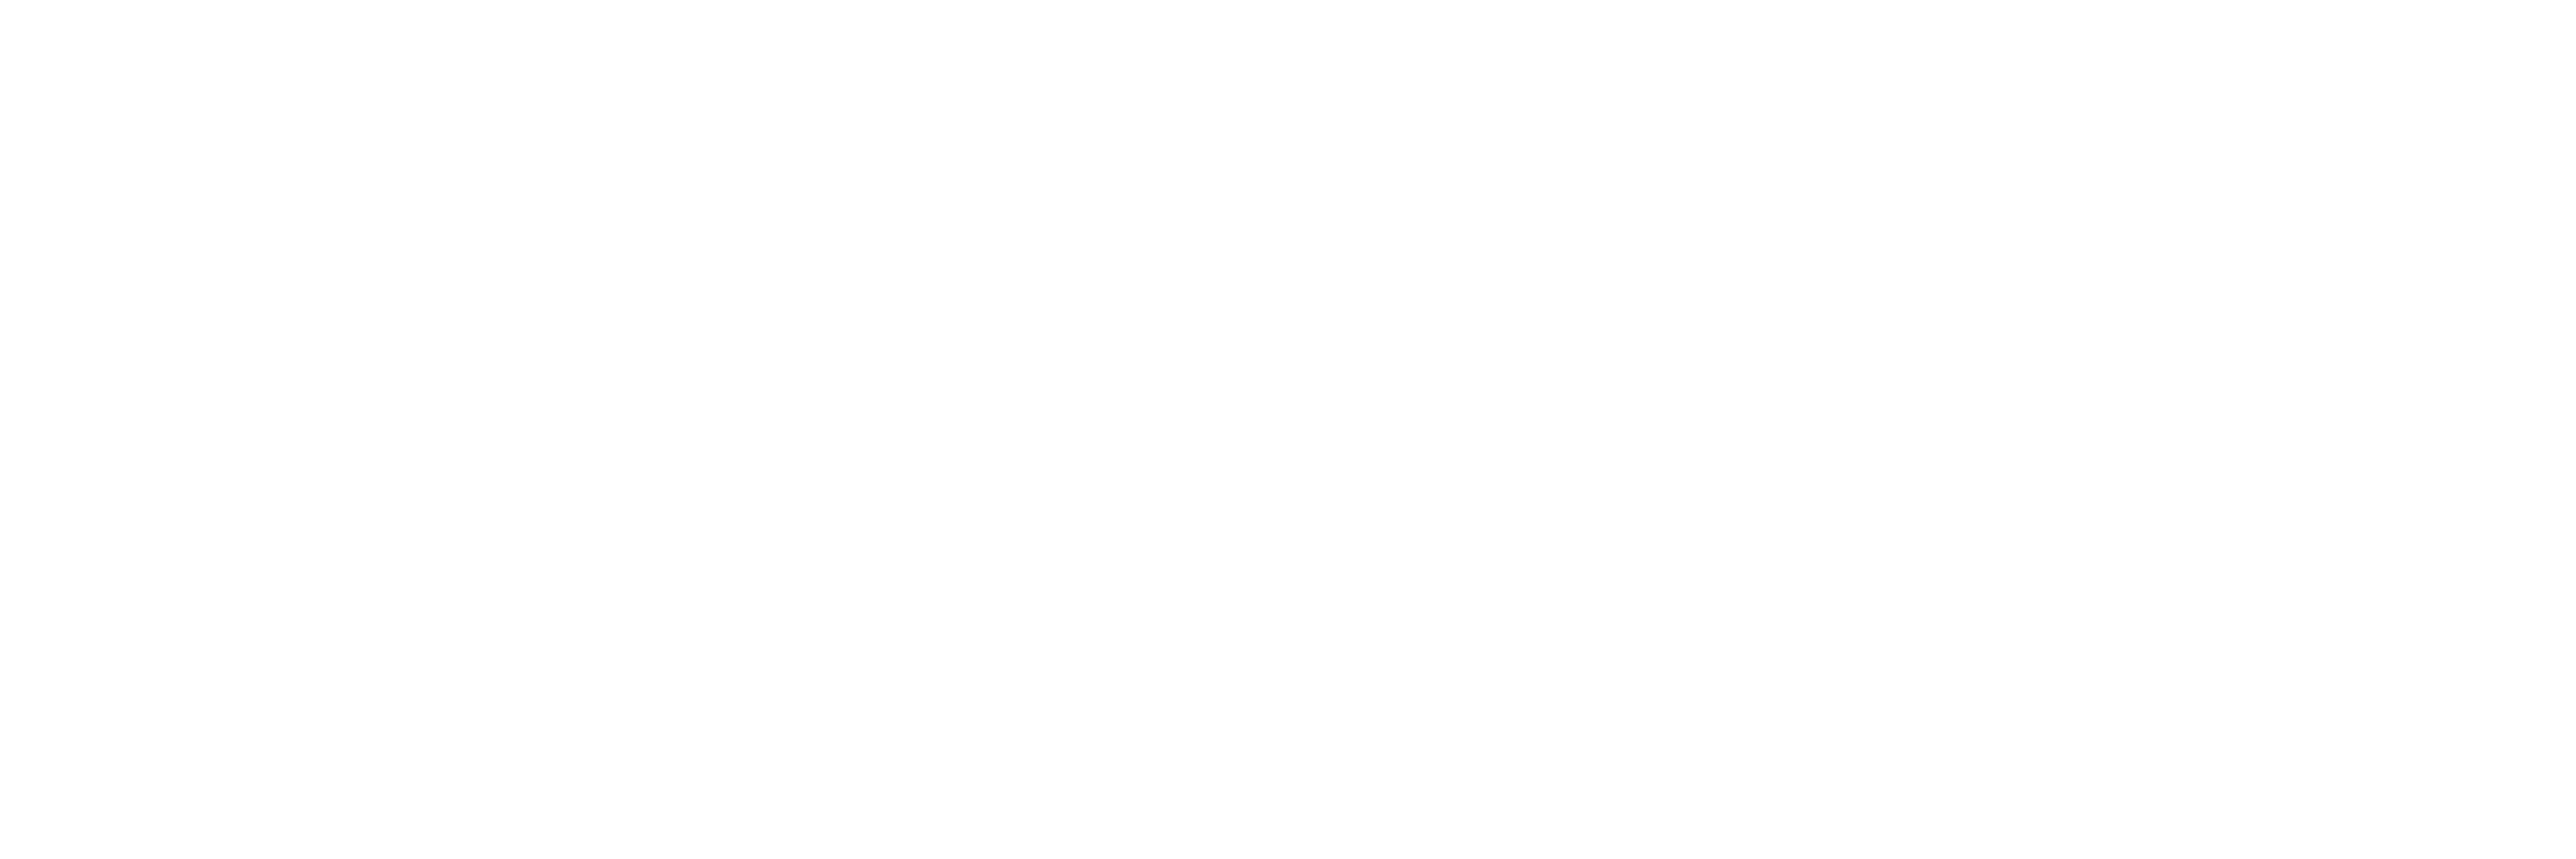

<IPython.core.display.Javascript object>


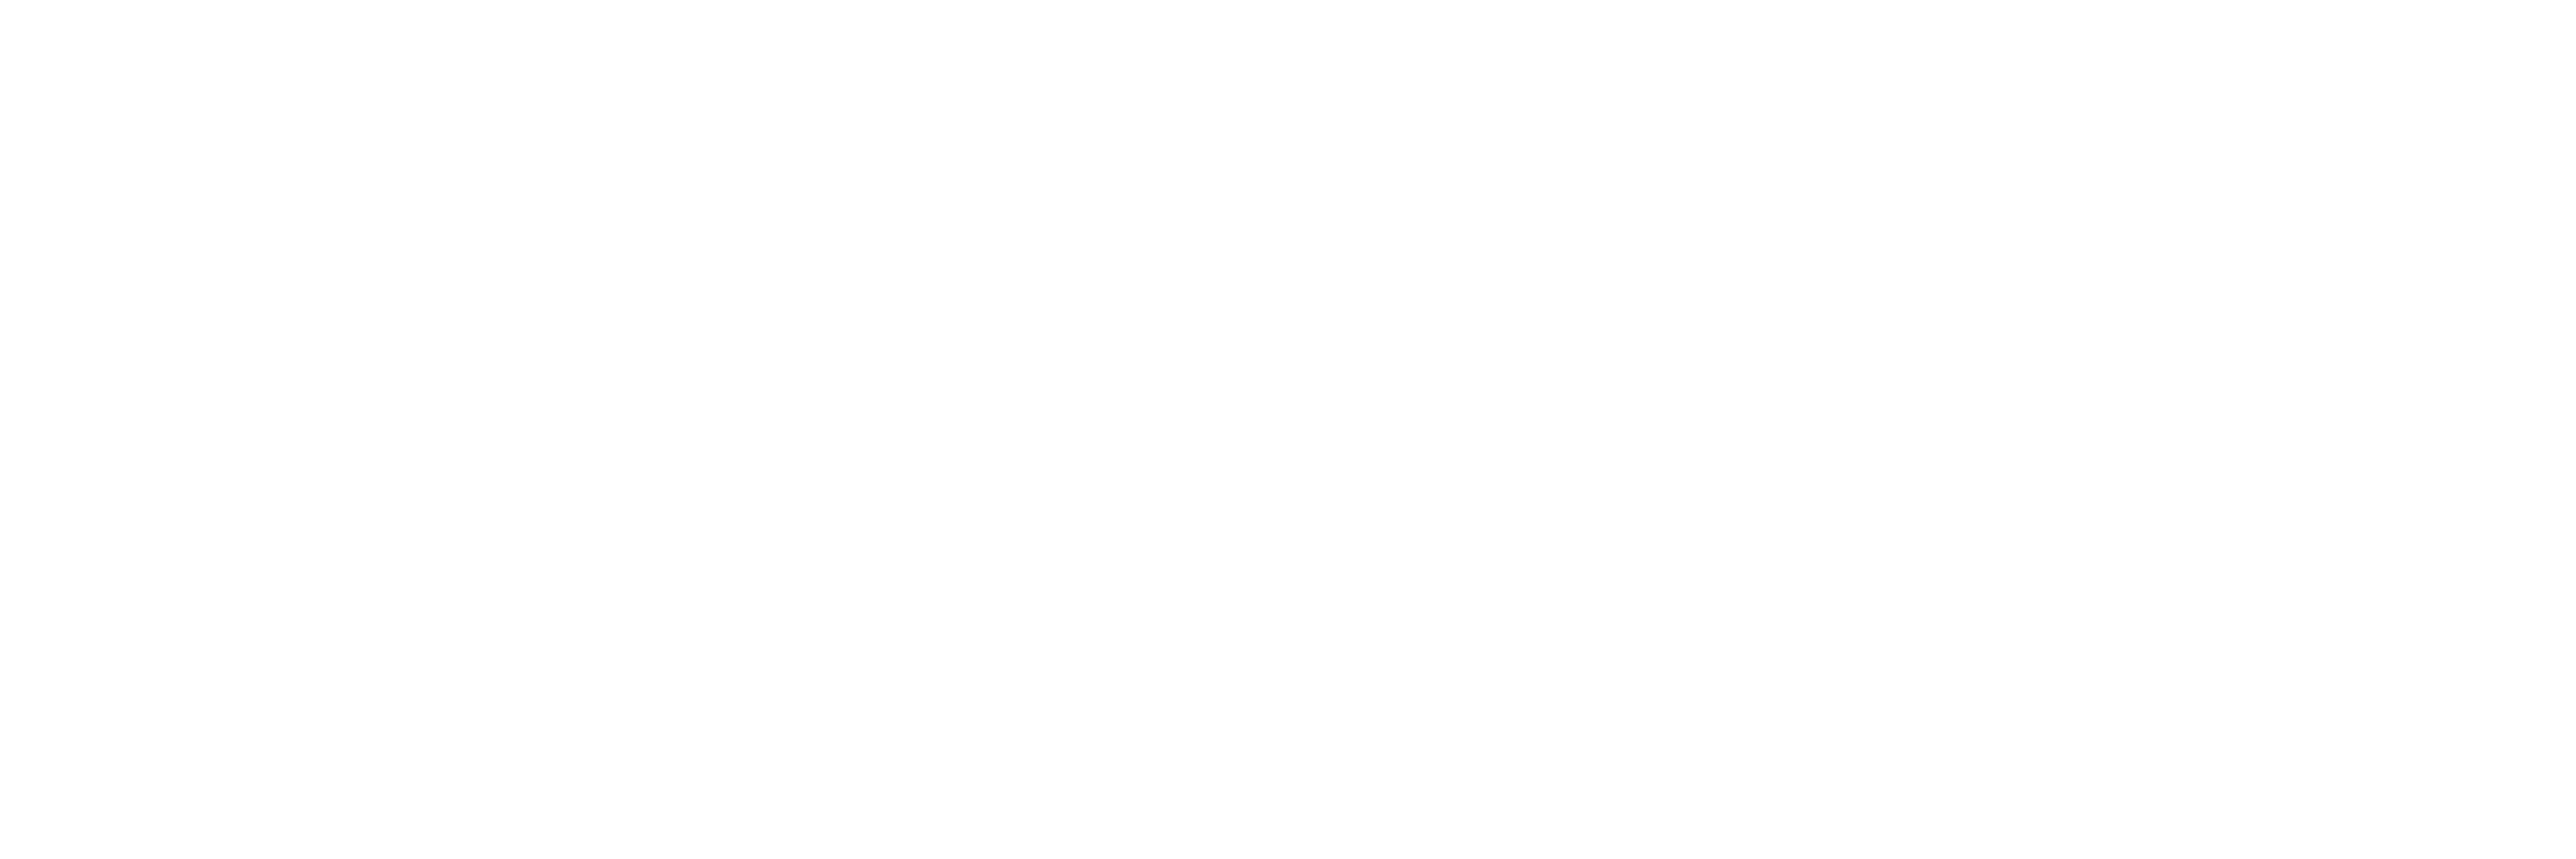

<IPython.core.display.Javascript object>


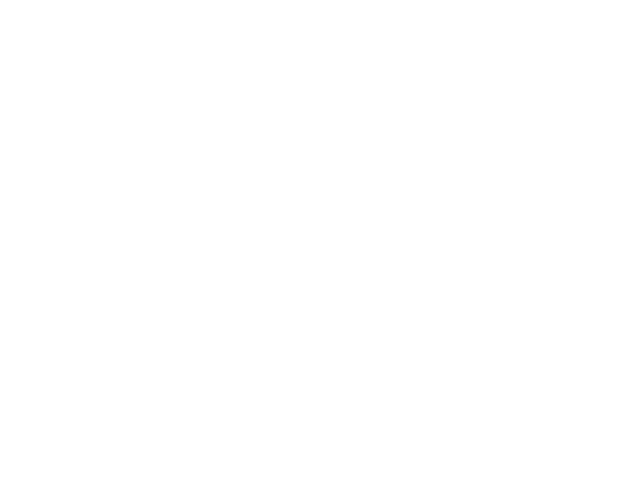

Plots created! Please check the directory "plot-poses" within the video directory


In [24]:
%matplotlib notebook 
#for making interactive plots.
# videos=[LIST OF VIDEOS]
for videofile_path in videos:
    deeplabcut.plot_trajectories(path_config_file,videofile_path)

In [58]:
?deeplabcut.plot_trajectories

In [72]:
import numpy as np
import pandas as pd

## Pandas analysis of Data

In [74]:
df = pd.read_hdf(r"PATH TO .h5 FILE")
df.head(5)

scorer    DeepCut_resnet50_frontslowmoJun5shuffle1_30000                \
bodyparts                                       LeftHand                 
coords                                                 x             y   
count                                       15560.000000  15560.000000   
mean                                          971.243753    725.853752   
std                                           171.896374    139.390499   
min                                            -3.870381      0.415488   
25%                                           914.894261    649.265245   
50%                                          1024.541650    783.569860   
75%                                          1064.598903    821.210082   
max                                          1611.307688   1088.421771   

scorer                                                             \
bodyparts                   RightHand                               
coords       likelihood             x             y    likelihood   
count      15560.000000  15560.000000  15560.000000  15560.000000   
mean           0.699717    906.089441    738.766505      0.503567   
std            0.357561    156.673818    166.830793      0.400728   
min            0.000027    319.477097      1.081914      0.000040   
25%            0.397388    850.580156    651.611459      0.060324   
50%            0.910440    905.468754    778.514918      0.466857   
75%            0.986921    940.134475    858.174915      0.949224   
max            0.999329   1609.412701   1092.391703      0.999041   

scorer                                                             \
bodyparts          Nose                                    Pellet   
coords                x             y    likelihood             x   
count      15560.000000  15560.000000  15560.000000  15560.000000   
mean         931.766309    656.488581      0.671245    957.103689   
std          169.306891    191.976523      0.363396    159.386299   
min          298.748627     -0.059892      0.000104     -5.040360   
25%          909.805872    595.394240      0.306699    922.235798   
50%          918.396317    703.317179      0.875269    939.903313   
75%          928.343641    794.728728      0.960582    953.739810   
max         1623.930874   1088.734671      0.998151   1613.409633   

scorer                                 
bodyparts                              
coords                y    likelihood  
count      15560.000000  15560.000000  
mean         811.306070      0.322458  
std          177.523694      0.418997  
min            0.012989      0.000098  
25%          671.503496      0.027885  
50%          847.006353      0.048265  
75%          940.497040      0.954270  
max         1089.468144      0.997180

In [15]:
df.describe()

scorer    DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000  \
bodyparts                                                     LeftHand   
coords                                                               x   
count                                             612.000000             
mean                                             1294.587569             
std                                               566.489027             
min                                                -0.173059             
25%                                               955.338525             
50%                                              1458.549845             
75%                                              1644.293059             
max                                              2161.044888             

scorer                                                                    \
bodyparts                             RightHand                            
coords               y  likelihood            x            y  likelihood   
count       612.000000  612.000000   612.000000   612.000000  612.000000   
mean       2455.822662    0.042246   609.627308  2811.817150    0.078364   
std         890.589556    0.138305   523.969844   763.555947    0.202453   
min           1.988913    0.000032     0.665848    76.401595    0.000153   
25%        1989.080632    0.000861     3.883312  2168.396138    0.001087   
50%        2089.116435    0.002397   764.576838  2395.076544    0.003136   
75%        3421.296761    0.011128   970.543810  3556.132724    0.019450   
max        3840.645847    0.977641  2139.572770  3840.410774    0.992057   

scorer                                                                     \
bodyparts         Nose                                Pellet                
coords               x            y  likelihood            x            y   
count       612.000000   612.000000  612.000000   612.000000   612.000000   
mean       1000.140640  2138.825481    0.222379  1161.420468  3607.459208   
std         249.147238   615.631056    0.313997   635.214989   435.197877   
min           0.269251   865.347540    0.000097     2.184450  1940.036492   
25%         990.724893  1820.097459    0.004228   736.731850  3637.395378   
50%        1030.763698  1986.446780    0.050586   963.540944  3822.212681   
75%        1069.846140  2166.098999    0.300523  1822.975545  3837.997508   
max        2152.967607  3841.093842    0.998524  2158.995823  3841.865475   

scorer                 
bodyparts              
coords     likelihood  
count      612.000000  
mean         0.364173  
std          0.308807  
min          0.000428  
25%          0.070970  
50%          0.276980  
75%          0.658898  
max          0.989263